In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import scipy
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
data=pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data[data['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [4]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(),inplace=True)

In [5]:
le=LabelEncoder()
data['le_ocean_proximity'] = le.fit_transform(data['ocean_proximity'])
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,le_ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1


In [6]:
data.drop(columns='ocean_proximity',inplace=True)

In [7]:
x=data.drop('median_house_value',axis=1)
y=data['median_house_value']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
lin_reg=LinearRegression()
rf_reg=RandomForestRegressor()

In [10]:
columns=['LinearRegression','RandomForestRegressor']
train_score=[]
rec_score=[]
mae_val=[]
mse_val=[]


In [11]:
def all(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_train=model.score(x_train,y_train)*100
    recall_result=r2_score(y_pred,y_test)*100
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    train_score.append(accuracy_train)
    rec_score.append(recall_result)
    mse_val.append(mse)
    mae_val.append(mae)
    print('Accuracy after train the model is :',accuracy_train)
    print('Result recall score is :',recall_result)
    
    print('Mean Squared Error :' , mse)
    print('Mean Absolute Error :',mae)   


In [12]:
all(lin_reg)

Accuracy after train the model is : 63.789665544110264
Result recall score is : 40.44616554177376
Mean Squared Error : 4875794585.244859
Mean Absolute Error : 51054.32587651551


In [13]:
all(rf_reg)

Accuracy after train the model is : 97.41233256812689
Result recall score is : 76.83625106003043
Mean Squared Error : 2362117920.5374913
Mean Absolute Error : 32122.31308139535


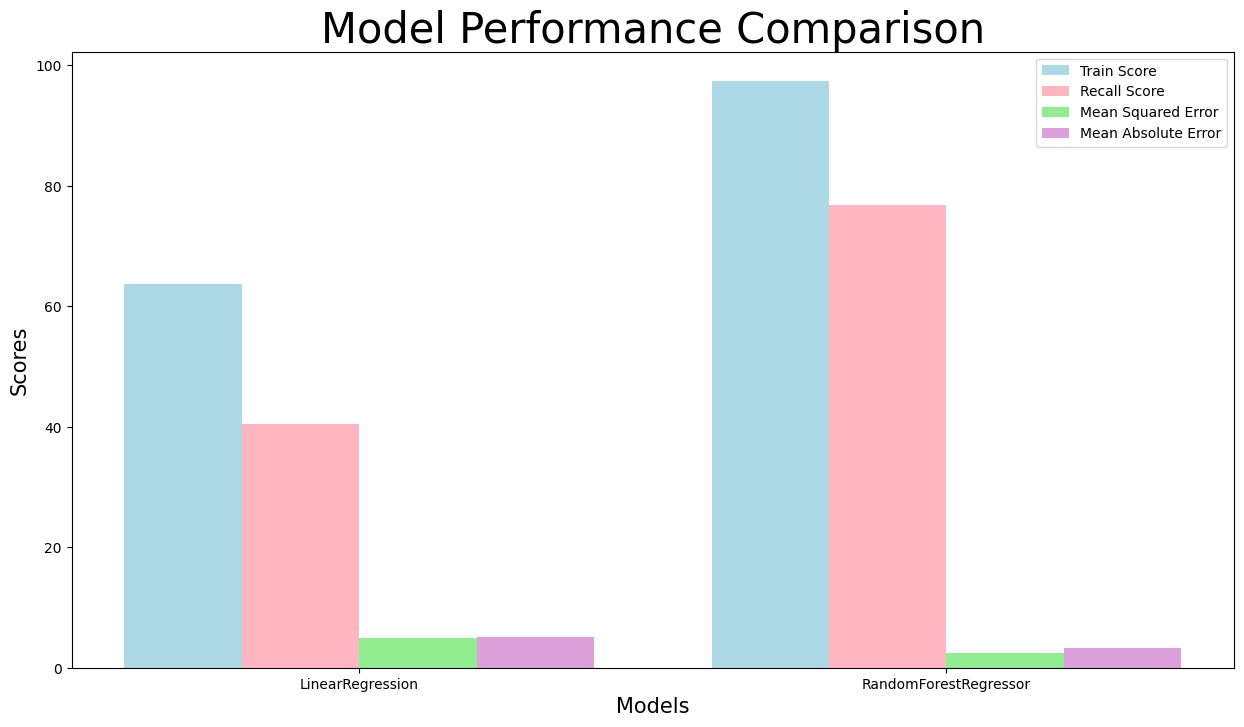

Liear Rgression Model Results: train_score: 63.789665544110264 rec_score: 40.44616554177376 mse_val: 4875794585.244859 mae_val: 51054.32587651551
Random Forest Regressor: train_score: 97.41233256812689 rec_score: 76.83625106003043 mse_val: 2362117920.5374913 mae_val: 32122.31308139535


In [16]:
n_bars = len(columns)
bar_width = 0.2
xpos = np.arange(n_bars)


mse_val_scaled = [x / 1e9 for x in mse_val]
mae_val_scaled = [x / 1e4 for x in mae_val]

plt.figure(figsize=(15, 8))

bars1 = plt.bar(xpos - 1.5 * bar_width, train_score, width=bar_width, label="Train Score", color='lightblue')
bars2 = plt.bar(xpos - 0.5 * bar_width, rec_score, width=bar_width, label="Recall Score", color='lightpink')
bars3 = plt.bar(xpos + 0.5 * bar_width, mse_val_scaled, width=bar_width, label="Mean Squared Error", color='lightgreen')
bars4 = plt.bar(xpos + 1.5 * bar_width, mae_val_scaled, width=bar_width, label="Mean Absolute Error", color='plum')


plt.xticks(xpos, columns)
plt.xlabel("Models", fontsize=15)
plt.ylabel("Scores", fontsize=15)
plt.title("Model Performance Comparison", fontsize=30)
plt.legend()

plt.show()
print("Liear Rgression Model Results:","train_score:", train_score[0],"rec_score:", rec_score[0],"mse_val:", mse_val[0],"mae_val:", mae_val[0])
print("Random Forest Regressor:","train_score:", train_score[1],"rec_score:", rec_score[1],"mse_val:", mse_val[1],"mae_val:", mae_val[1])

